# **菊安酱与菜菜的Python机器学习可视化**

### <font color='bule'>第四期  分布图：22密度图 & 23直方密度曲线图

**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [1]:
# import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
# plt.rcParams['axes.unicode_minus']=False   #显示负号

### <font color=bule> 22/50 密度图（Density Plot）

密度图，又称为密度曲线图。在分布图中，密度图是一种常用的工具。对于连续变量来说，如果想要把它的分布状况进行可视化，那密度图就是一个很好的选择。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/%E5%AF%86%E5%BA%A6%E5%9B%BE.png' width=500>

这幅图的主要目的就是反映城市里程如何随着气缸数量的变化而变化

横坐标：城市里程   
纵坐标：概率密度   
图例：不同种类气缸数量   

### 1. 导入需要的绘图库

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#如果用jupyter notebook则需要这行代码让你的图像显示，如果是jupyterlab则不需要

plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #显示负号

### 2.认识绘制密度图的函数

#### <font color='blue'>密度图是直方图的一种变形
下面我们一起来看一下直方图和密度图的对比。    
（下面这两个图，用的是同一个数据）

<img src = 'http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/%E7%9B%B4%E6%96%B9%E5%9B%BEvs%E5%AF%86%E5%BA%A6%E5%9B%BE.png'>

#### 直方图 vs 密度图
> 1. 直方图表示的是在不同取值区间里分别有多少个值，而密度图表示的是在不同取值区间里的概率密度
> 2. 密度图曲线下的总面积为1（可以用积分证明）
> 3. 大多数密度图使用的是核密度估计，核密度的计算就是一个比较复杂的数学过程了
> 4. 通俗理解：密度图中的纵坐标用于不同类别之间的相对比较的值

如果你还是比较困惑的话，可以看下面的例子:   
假设我们有5个样本,每个样本点在下图中显示为X轴上的小黑色垂直线    
各个内核（这里用的是高斯核）显示在每个点上方，用红色虚线绘制    
通过对各个点的高斯核求和，形成了蓝色曲线，这一条曲线就是我们需要的密度曲线了。   

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/%E5%AF%86%E5%BA%A6%E8%AE%B2%E8%A7%A3%E5%AE%9E%E4%BE%8B.png' width=300>

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/%E5%AF%86%E5%BA%A6%E8%AE%B2%E8%A7%A3%E5%9B%BE%E5%BD%A2.png' width=300>

>在密度图中，x轴是变量的值，就像在直方图中一样，但是y轴的值表示的是什么呢？密度图中的y轴表示的核密度估计的概率密度函数。但是我们需要注意的是这里是**概率密度**而不是概率。

>概率密度与概率的差异就是，概率密度指的是x轴上每单位的概率。如果想要转换为实际概率的话，需要在x轴上找到特定区间的曲线下面积。这些听起来可能会非常的困惑，尤其是遇到y轴的取值大于1的时候，所以我们需要明白概率密度不是概率，而我们的**y轴是可以取到大于1**的值。    

>所以通常情况下，我会将密度图上的y轴当做仅仅是用于比较不同类别之间的相对值。

**sns.kdeplot()**
> 函数功能
>> 拟合并绘制单变量或双变量核密度估计值  

> 重要参数   
>> data：数据集，可以只输入一个，也可以输入两个   
>> shade：在密度曲线下方加阴影（如果数据是双变量时，填充轮廓）   
>> vertical：控制密度轴向   
>> bw：类似于直方图中的binwidth，用于确定核大小    
>> kernel：核函数(双变量KDE只能使用高斯核)

>>> 核函数种类说明：   
>>> gau:gaussian高斯核（常用）   
>>> cos:cosine余弦     
>>> biw:biweight 四次   
>>> epa:Epanechnikov 抛物线   
>>> tri:triangle三角   
>>> triw:triweight 三次   

参数说明：https://seaborn.pydata.org/generated/seaborn.kdeplot.html

关于核种类：https://en.wikipedia.org/wiki/Kernel_%28statistics%29

#### <font color='blue'>绘制简单的密度图

In [2]:
#构造数据,满足正态分布的1000个数
data = np.random.randn(1000)

In [4]:
data

array([ 6.87669438e-02,  1.42947255e+00, -7.27289437e-01,  2.48036670e+00,
       -4.06826114e-01, -6.67105588e-01,  5.14755950e-01, -5.05693824e-01,
       -4.80271451e-01,  2.11426146e+00,  9.80048577e-02,  5.49969318e-02,
       -5.82359384e-01,  9.56989231e-01, -1.24182953e+00, -3.36530419e-01,
       -1.77436428e+00,  1.50944904e+00,  2.35263706e-02,  7.97380897e-01,
       -2.04845305e-01,  1.27167916e+00,  4.49865799e-01, -1.23146458e+00,
        2.35205038e-01,  7.87051341e-01,  8.87216455e-02,  7.82297136e-01,
        1.80136378e+00, -1.10760099e+00, -5.24901815e-01, -2.53051871e-01,
       -1.95292627e+00, -1.42949525e+00, -4.73118121e-01, -6.71658566e-01,
        5.88443783e-01, -1.37379268e-01, -4.47149675e-01, -2.56011626e-01,
       -8.18284887e-01,  3.54602138e-01, -8.03980681e-01, -1.55376044e+00,
        5.62007139e-01, -9.17256070e-01, -1.17982941e+00,  3.51828885e-01,
        3.83857327e-01,  9.88271590e-01,  6.47128621e-01,  2.09626808e-02,
        4.68446260e-01, -

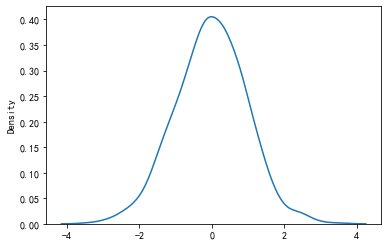

In [5]:
#画一个简单的密度图
sns.kdeplot(data);

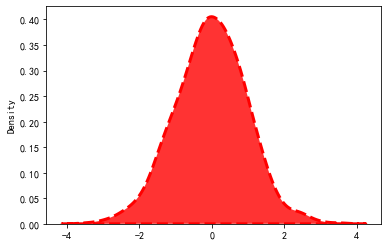

In [7]:
#给密度图添加一些简单装饰
sns.kdeplot(data
            ,shade=True       #填充曲线下阴影的控制参数
            #,vertical=True
            ,color='r'   #控制颜色
            ,alpha=0.8  #控制颜色的色彩饱和度
            ,linewidth=3
            ,linestyle='--'
           );

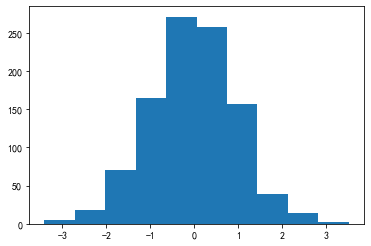

In [8]:
plt.hist(data);

### 3.认识所用数据集

In [9]:
#导入数据
df = pd.read_csv("‪D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\mpg_ggplot2.csv")

In [24]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [25]:
df.shape

(234, 11)

In [26]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [27]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆类型"]

In [28]:
zip(df.columns,np.array(name))

In [29]:
[*zip(df.columns,np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆类型')]

### 4.绘制密度图   
今天绘制的目标图形是城市里程随气缸数变化的密度图

In [30]:
#首先我们一起来看一下城市里程
df.cty.values

array([18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17, 15, 15, 17,
       16, 14, 11, 14, 13, 12, 16, 15, 16, 15, 15, 14, 11, 11, 14, 19, 22,
       18, 18, 17, 18, 17, 16, 16, 17, 17, 11, 15, 15, 16, 16, 15, 14, 13,
       14, 14, 14,  9, 11, 11, 13, 13,  9, 13, 11, 13, 11, 12,  9, 13, 13,
       12,  9, 11, 11, 13, 11, 11, 11, 12, 14, 15, 14, 13, 13, 13, 14, 14,
       13, 13, 13, 11, 13, 18, 18, 17, 16, 15, 15, 15, 15, 14, 28, 24, 25,
       23, 24, 26, 25, 24, 21, 18, 18, 21, 21, 18, 18, 19, 19, 19, 20, 20,
       17, 16, 17, 17, 15, 15, 14,  9, 14, 13, 11, 11, 12, 12, 11, 11, 11,
       12, 14, 13, 13, 13, 21, 19, 23, 23, 19, 19, 18, 19, 19, 14, 15, 14,
       12, 18, 16, 17, 18, 16, 18, 18, 20, 19, 20, 18, 21, 19, 19, 19, 20,
       20, 19, 20, 15, 16, 15, 15, 16, 14, 21, 21, 21, 21, 18, 18, 19, 21,
       21, 21, 22, 18, 18, 18, 24, 24, 26, 28, 26, 11, 13, 15, 16, 17, 15,
       15, 15, 16, 21, 19, 21, 22, 17, 33, 21, 19, 22, 21, 21, 21, 16, 17,
       35, 29, 21, 19, 20

In [31]:
#气缸数
df.cyl.value_counts()  #可以看出气缸数有4种类型：4缸、5缸、6缸、8缸

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

绘制气缸数为4的城市里程密度图

In [32]:
df.loc[df.cyl==4,'cty'].values

array([18, 21, 20, 21, 18, 16, 20, 19, 19, 22, 18, 28, 24, 25, 23, 24, 26,
       25, 24, 21, 18, 18, 21, 21, 19, 19, 20, 20, 21, 19, 23, 23, 18, 18,
       20, 19, 20, 18, 21, 19, 19, 19, 20, 20, 19, 20, 15, 16, 21, 21, 21,
       21, 21, 21, 21, 22, 24, 24, 26, 28, 26, 15, 16, 17, 21, 19, 21, 22,
       33, 21, 19, 22, 21, 35, 29, 21, 19, 21, 18, 19, 21], dtype=int64)

In [33]:
#筛选出气缸数为4的城市里程
c4 = df.loc[df.cyl==4,'cty'].values
c4

array([18, 21, 20, 21, 18, 16, 20, 19, 19, 22, 18, 28, 24, 25, 23, 24, 26,
       25, 24, 21, 18, 18, 21, 21, 19, 19, 20, 20, 21, 19, 23, 23, 18, 18,
       20, 19, 20, 18, 21, 19, 19, 19, 20, 20, 19, 20, 15, 16, 21, 21, 21,
       21, 21, 21, 21, 22, 24, 24, 26, 28, 26, 15, 16, 17, 21, 19, 21, 22,
       33, 21, 19, 22, 21, 35, 29, 21, 19, 21, 18, 19, 21], dtype=int64)

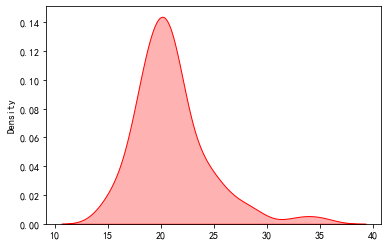

In [34]:
#绘制图形
sns.kdeplot(c4
            ,shade=True
            ,color='r'
            ,alpha=0.3
            ,label='Cyl=4'
           );

同样的方法可以依次绘制出5缸、6缸、8缸的城市里程密度图

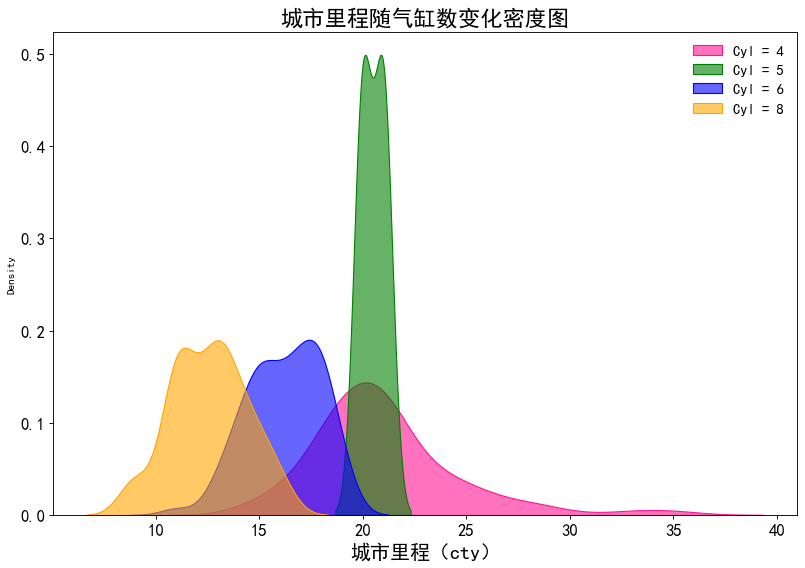

In [39]:
#提取绘图数据
c4 = df.loc[df.cyl==4,'cty'].values
c5 = df.loc[df.cyl==5,'cty'].values
c6 = df.loc[df.cyl==6,'cty'].values
c8 = df.loc[df.cyl==8,'cty'].values

#创建画布并设定画布尺寸
plt.figure(figsize=(12,8),dpi=80)

#绘制图形
sns.kdeplot(c4,shade=True,color='deeppink',alpha=0.6,label='Cyl = 4')
sns.kdeplot(c5,shade=True,color='green',alpha=0.6,label='Cyl = 5')
sns.kdeplot(c6,shade=True,color='blue',alpha=0.6,label='Cyl = 6')
sns.kdeplot(c8,shade=True,color='orange',alpha=0.6,label='Cyl = 8')

#添加装饰
plt.title('城市里程随气缸数变化密度图',fontsize=20) #添加标题
plt.xlabel('城市里程（cty）',fontsize=18) #X轴标题
plt.xticks(fontsize=15) #x轴刻度字体的大小
plt.yticks(fontsize=15) #y轴刻度字体的大小
plt.legend(fontsize=13,loc=0,frameon=False); #显示图例，loc=0表示图例放在右上角，frameon=False表示不显示图例外框

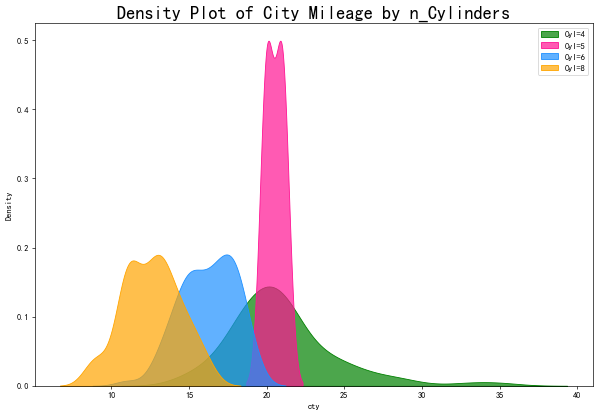

In [43]:
#源代码

# Import Data
df = pd.read_csv("‪D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\mpg_ggplot2.csv") #导入数据集

# Draw Plot
plt.figure(figsize=(12,8), dpi= 60) #创建画布并设定画布大小
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)           #绘制气缸数为4的密度曲线
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)    #绘制气缸数为5的密度曲线
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)  #绘制气缸数为6的密度曲线
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)      #绘制气缸数为8的密度曲线

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22) #添加标题
plt.legend() #添加图例
plt.show()   #本地显示图形

### 5. 图像解读

### <font color=bule> 23/50 直方密度曲线图（Density Curves with Histogram）

直方密度曲线图其实就是直方图和密度图的结合，把两种图放在同一个图形里面。所以我们可以从这一个图里面同时看到直方图和密度图两个图传达出来的信息

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/%E7%9B%B4%E6%96%B9%E5%AF%86%E5%BA%A6%E7%BA%BF%E5%9B%BE.png' width=500>

横坐标：城市里程   
纵坐标：概率密度   
图例：汽车类型   

### 1.导入相应的绘图包

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#如果用jupyter notebook则需要这行代码让你的图像显示，如果是jupyterlab则不需要

plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #显示负号

### 2. 认识绘制直方密度曲线图的函数

**sns.distplot()**
> 重要参数   
>> a：绘制图形的数据   
>> bins：直方图参数,把数据分成多少个箱子   
>> hist：控制直方图显示的参数（True/False,默认是True）   
>> kde：控制密度曲线显示的参数（True/False,默认是True）    
>> hist_kws：直方图控制参数  
>> kde_kws：密度图控制参数  

#### 绘制简单的直方密度曲线图

In [45]:
#创建100个满足正态分布的数据
X = np.random.randn(100)

In [46]:
X

array([ 0.5048336 ,  0.17568019, -0.32704557, -0.43292878, -0.86768161,
       -0.10140049,  0.3131507 ,  0.27934496, -2.05089048, -0.85194523,
        1.44293965,  1.27287649, -0.20570771,  0.2405613 ,  1.55186521,
       -0.20199289, -0.07795098,  0.08821475,  0.33363812, -2.52333689,
        0.28285424, -0.46247687, -0.98156548, -0.45752057,  2.42025588,
       -0.43014034,  0.29276196,  0.0600584 ,  0.26766977, -0.45459668,
       -1.016741  ,  1.81983709,  0.966197  , -1.09058301,  0.65148861,
       -0.45128535, -2.14972519, -0.21494831,  1.20807204,  0.40649035,
        0.61220047,  1.11109365, -0.25606681,  0.06642192,  0.70220854,
       -0.29124008, -0.19032198, -0.58197901, -1.33115586,  0.06188102,
       -1.11770025,  0.68485616,  1.07327004, -0.79540685, -0.4926924 ,
        1.06077178,  0.9432877 ,  1.0201758 ,  0.81267129,  1.62204662,
       -0.01868532, -0.79191662, -0.22950348, -1.28414136, -0.11959758,
        0.1956841 , -0.59010771,  0.29927793,  0.25401614,  0.32

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


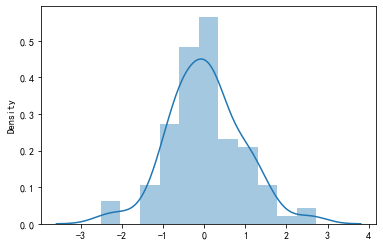

In [51]:
#绘制简单的直方密度线图
sns.distplot(X);

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


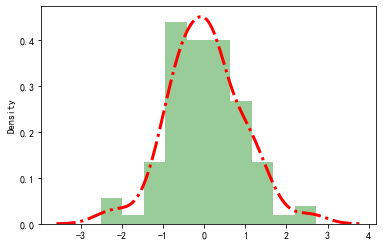

In [52]:
#尝试图形中的参数
sns.distplot(X
             ,bins=10
             #,hist=False
             #,kde=False
             ,hist_kws={'color':'g','histtype':'bar','alpha':0.4} 
             ,kde_kws={'color':'r','linestyle':'-.','linewidth':3,'alpha':0.7}
            );

条形图的种类有四种：  
- bar：简单的条形图（默认）
- barstacked：堆积条形图
- step：默认未填充的线图
- stepfilled：默认被填充的线图

### 3.认识绘制图形的数据集

In [55]:
df = pd.read_csv("‪D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\mpg_ggplot2.csv")

In [57]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [58]:
df.shape

(234, 11)

In [59]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [60]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份"
        ,"气缸数量","手动/自动","驱动类型","城市里程/加仑"
        ,"公路里程/加仑","汽油种类","车辆类型"]

In [61]:
[*zip(df.columns,np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆类型')]

### 4.绘制直方密度曲线图

我们绘制目标图形需要的数据是：城市里程，汽车种类

In [62]:
#查看城市里程
df['cty'].values

array([18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17, 15, 15, 17,
       16, 14, 11, 14, 13, 12, 16, 15, 16, 15, 15, 14, 11, 11, 14, 19, 22,
       18, 18, 17, 18, 17, 16, 16, 17, 17, 11, 15, 15, 16, 16, 15, 14, 13,
       14, 14, 14,  9, 11, 11, 13, 13,  9, 13, 11, 13, 11, 12,  9, 13, 13,
       12,  9, 11, 11, 13, 11, 11, 11, 12, 14, 15, 14, 13, 13, 13, 14, 14,
       13, 13, 13, 11, 13, 18, 18, 17, 16, 15, 15, 15, 15, 14, 28, 24, 25,
       23, 24, 26, 25, 24, 21, 18, 18, 21, 21, 18, 18, 19, 19, 19, 20, 20,
       17, 16, 17, 17, 15, 15, 14,  9, 14, 13, 11, 11, 12, 12, 11, 11, 11,
       12, 14, 13, 13, 13, 21, 19, 23, 23, 19, 19, 18, 19, 19, 14, 15, 14,
       12, 18, 16, 17, 18, 16, 18, 18, 20, 19, 20, 18, 21, 19, 19, 19, 20,
       20, 19, 20, 15, 16, 15, 15, 16, 14, 21, 21, 21, 21, 18, 18, 19, 21,
       21, 21, 22, 18, 18, 18, 24, 24, 26, 28, 26, 11, 13, 15, 16, 17, 15,
       15, 15, 16, 21, 19, 21, 22, 17, 33, 21, 19, 22, 21, 21, 21, 16, 17,
       35, 29, 21, 19, 20

In [63]:
#查看汽车类型
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

汽车种类一共有7种，分别是：SUV、小型车、中型车、迷你车、皮卡、迷你卡车、2座车

In [64]:
#以SUV为例，绘制直方密度图

#提取SUV类型车的城市里程
x1 = df.loc[df['class'] == 'suv','cty'].values

In [65]:
x1

array([14, 11, 14, 13, 12, 14, 11, 11, 14, 13, 13,  9, 13, 11, 13, 11, 11,
       11, 12, 14, 15, 14, 13, 13, 13, 17, 15, 15, 14,  9, 14, 13, 11, 11,
       12, 12, 11, 11, 11, 12, 14, 13, 13, 13, 14, 15, 14, 12, 18, 18, 20,
       19, 20, 18, 15, 16, 15, 15, 16, 14, 11, 13], dtype=int64)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


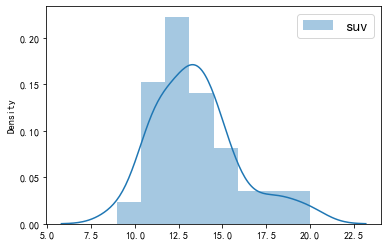

In [70]:
#绘制图形
sns.distplot(x1,label='suv')
plt.legend(fontsize=15);

如果想要把7种类型车的城市里程全部绘制出来的话，可以尝试用循环的方式

In [67]:
df['class'].values

array(['compact', 'compact', 'compact', 'compact', 'compact', 'compact',
       'compact', 'compact', 'compact', 'compact', 'compact', 'compact',
       'compact', 'compact', 'compact', 'midsize', 'midsize', 'midsize',
       'suv', 'suv', 'suv', 'suv', 'suv', '2seater', '2seater', '2seater',
       '2seater', '2seater', 'suv', 'suv', 'suv', 'suv', 'midsize',
       'midsize', 'midsize', 'midsize', 'midsize', 'minivan', 'minivan',
       'minivan', 'minivan', 'minivan', 'minivan', 'minivan', 'minivan',
       'minivan', 'minivan', 'minivan', 'pickup', 'pickup', 'pickup',
       'pickup', 'pickup', 'pickup', 'pickup', 'pickup', 'pickup', 'suv',
       'suv', 'suv', 'suv', 'suv', 'suv', 'suv', 'pickup', 'pickup',
       'pickup', 'pickup', 'pickup', 'pickup', 'pickup', 'pickup',
       'pickup', 'pickup', 'suv', 'suv', 'suv', 'suv', 'suv', 'suv',
       'suv', 'suv', 'suv', 'pickup', 'pickup', 'pickup', 'pickup',
       'pickup', 'pickup', 'pickup', 'subcompact', 'subcompact',
       'su

In [68]:
set(df['class'].values)

{'2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv'}

In [69]:
#将所有类型放到一个列表中
clas = list(set(df['class'].values))
clas

['2seater', 'subcompact', 'minivan', 'suv', 'midsize', 'compact', 'pickup']

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

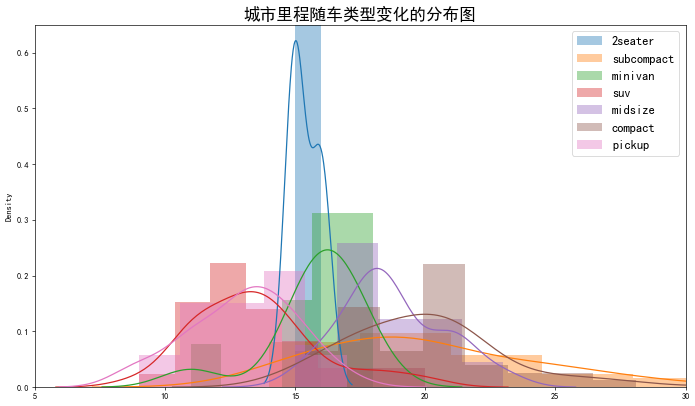

In [71]:
#创建画布
plt.figure(figsize = (14,8),dpi = 60)

#对每一种类型的车进行绘图
for i in clas:
    sns.distplot(df.loc[df['class'] == i,'cty'].values,label=i
                 #,hist=False
                )

#添加装饰
plt.title('城市里程随车类型变化的分布图',fontsize=20) #添加标题
plt.ylim(0,0.65) #设置y轴的刻度范围
plt.xlim(5,30) #设置y轴的刻度范围
plt.legend(fontsize=15); #显示图例

如果分类特别多的话，各种图形的交错就会更加复杂，那这样的绘图就不是很合适了    
而实际应用中，我们也不会将特别多的种类放到一起进行比较    
通常来说，会选择几个比较重要的分类来进行对比

### **绘制compact/suv/minivan这三种车的城市里程分布**

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

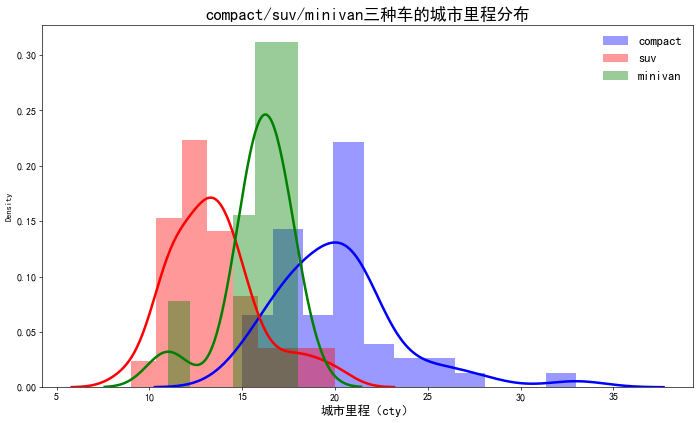

In [76]:
#提取出compact/suv/minivan这三种车的城市里程
compact = df.loc[df['class'] == 'compact', 'cty'].values
suv = df.loc[df['class'] == 'suv', 'cty'].values
minivan = df.loc[df['class'] == 'minivan', 'cty'].values

#创建画布
plt.figure(figsize = (14,8),dpi = 60)

#绘制图形
sns.distplot(compact,color='b',label='compact', hist_kws={'alpha':.4},kde_kws={'linewidth':3,'alpha':.7})
sns.distplot(suv,color='r',label='suv', hist_kws={'alpha':.4},kde_kws={'linewidth':3,'alpha':.7})
sns.distplot(minivan,color='g',label='minivan', hist_kws={'alpha':.4},kde_kws={'linewidth':3,'alpha':.7})

#装饰图形
plt.title('compact/suv/minivan三种车的城市里程分布',fontsize=20) #添加标题
plt.xlabel('城市里程（cty）',fontsize=15) #添加X轴标题
plt.xticks(fontsize=12) #设定X轴刻度的大小
plt.yticks(fontsize=12) #设定Y轴刻度的大小
plt.legend(fontsize=15,frameon=False); #显示图例

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

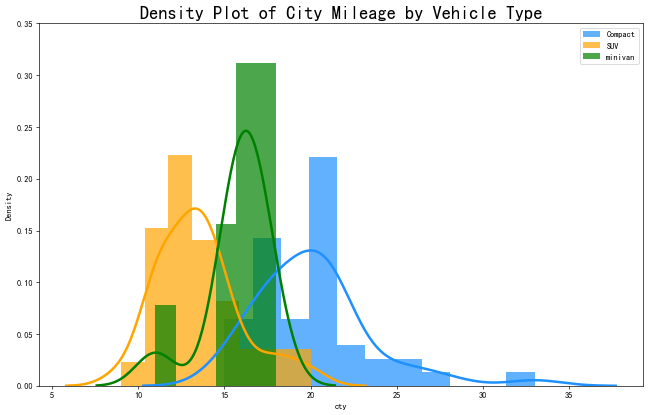

In [78]:
#源代码

# Import Data
df = pd.read_csv('D:\python数据处理——数据\橘安酱和菜菜的可视化全集\data\mpg_ggplot2.csv') #导入数据集

# Draw Plot
plt.figure(figsize=(13,8), dpi= 60) #创建画布
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)#设定Y轴刻度范围

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22) #添加标题
plt.legend() #添加图例
plt.show() #本地显示图形

### 5.图像解读